In [1]:
import numpy as np




In [2]:
precipitation_canandaigua = [0.00,0.04,0.84,0.00,0.,0.,0.02,0.05,0.01,0.09,0.18,0.04,0.04,0.00,0.06,0.03,
                            0.04,0.,0.,0.35,0.02,0.01,0.35,0.08,0.,0.,0.,0.,0.01,0.01,0.13]

mean_precip = np.mean(precipitation_canandaigua)
sum_precip = np.sum(precipitation_canandaigua)
stdev_precip = np.std(precipitation_canandaigua)
print(f"len(precipitation_canandaigua) ",len(precipitation_canandaigua))
print(f"mean_precip {mean_precip: .2f}")
print(f"sum_precip {sum_precip: .2f}")
print(f"stdev_precip {stdev_precip: .2f}")

len(precipitation_canandaigua)  31
mean_precip  0.08
sum_precip  2.40
stdev_precip  0.16


In [3]:
# Create a new vector of the same length
binary_precipitation = [1 if x > 0 else 0 for x in precipitation_canandaigua]

print(binary_precipitation)

[0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1]


In [4]:


def fit_markov_chain(binary_list):
  """
  Fits a first-order Markov chain to a binary list.

  Args:
    binary_list: A list of 0s and 1s.

  Returns:
    A 2x2 transition matrix.
  """

  # Count the number of transitions from 0 to 0, 0 to 1, 1 to 0, and 1 to 1
  counts = np.zeros((2, 2), dtype=int)
  for i in range(len(binary_list) - 1):
    counts[binary_list[i], binary_list[i+1]] += 1

  # Normalize the counts to get the transition probabilities
  row_sums = counts.sum(axis=1)
  transition_matrix = counts / row_sums[:, np.newaxis]

  return transition_matrix



In [5]:
# Example usage:

transition_matrix = fit_markov_chain(binary_precipitation)
print("transition_matrix",transition_matrix)

transition_matrix [[0.54545455 0.45454545]
 [0.21052632 0.78947368]]


The null hypthesis is that these data are from an independet Bernoulli experiment (coin flip)... 1 following the 0 following th 1 etc

In order to reject, we need a test if transition counts are consistent with null hypothesis

**Marginal totals**

n_0· = n_00 + n_01 

n_1· = n_10 + n_11

n_·0 = n_00 + n_10

n_·1 = n_01 + n_11

ChiSquare = SUM_i SUM_j (n_ij-e_ij)**2/e_ij


In [6]:
n_00 = 6 # Numer of 0's followed by 0's
n_01 = 5 # Numer of 0's followed by 1's
n_10 = 4 # Numer of 1's followed by 0's
n_11 = 15 # Numer of 1's followed by 1's

In [7]:
n_0i = n_00 + n_01
n_1i = n_10 + n_11
n_i0 = n_00 + n_10
n_i1 = n_01 + n_11

print("n_0i ",n_0i)
print("n_1i ",n_1i)
print("n_i0 ",n_i0)
print("n_i1 ",n_i1)


#e_ij = n_i· * n_·j/n Chi Square Distribution Expectation totals
e_00 =n_0i * n_i0/30
e_01 =n_0i * n_i1/30
e_10 =n_1i * n_i0/30
e_11 =n_1i * n_i1/30

print("e_00 ",e_00)
print("e_01 ",e_01)
print("e_10 ",e_10)
print("e_11 ",e_11)

# ChiSquare = SUM_i SUM_j (n_ij-e_ij)**2/e_ij

n_0i  11
n_1i  19
n_i0  10
n_i1  20
e_00  3.6666666666666665
e_01  7.333333333333333
e_10  6.333333333333333
e_11  12.666666666666666


In [8]:
Chi_square = ((n_00 - e_00)**2)/e_00 + ((n_01 - e_01))**2/e_01+(n_10 - e_10)**2/e_10 + (n_11 - e_11)**2/e_11

In [9]:
print("ChiSquare Root",np.sqrt(Chi_square))
print("ChiSquare",(Chi_square))

ChiSquare Root 1.8752990192188694
ChiSquare 3.5167464114832536


**The Null Hypothesis can be accepted**

In [10]:
#P_01 Probability 0's following 1's

p_01 = n_01/n_0i
p_11 = n_11/n_1i

print("p_01 ",p_01)
print("p_11 ",p_11)


p_01  0.45454545454545453
p_11  0.7894736842105263


**Autocorrelation**

In [11]:
import numpy as np

def autocorrelation_binary(binary_data, lag):
  """
  Calculates the autocorrelation for binary data at a given lag.

  Args:
    binary_data: A list or NumPy array of binary values (0 or 1).
    lag: The lag for which to calculate autocorrelation.

  Returns:
    The autocorrelation coefficient.
  """

  n = len(binary_data) - lag
  x = binary_data[:n]
  y = binary_data[lag:]

  # Calculate the correlation coefficient
  corr = np.corrcoef(x, y)[0, 1]
  return corr

# Example usage:
binary_data = binary_precipitation
autocorr_1 = autocorrelation_binary(binary_data, 1)
autocorr_2 = autocorrelation_binary(binary_data, 2)
autocorr_3 = autocorrelation_binary(binary_data, 3)

print("Autocorrelation for lag 1:", autocorr_1)
print("Autocorrelation for lag 2:", autocorr_2)
print("Autocorrelation for lag 3:", autocorr_3)

Autocorrelation for lag 1: 0.342381191631163
Autocorrelation for lag 2: -0.11858190977053469
Autocorrelation for lag 3: -0.2943314730754778


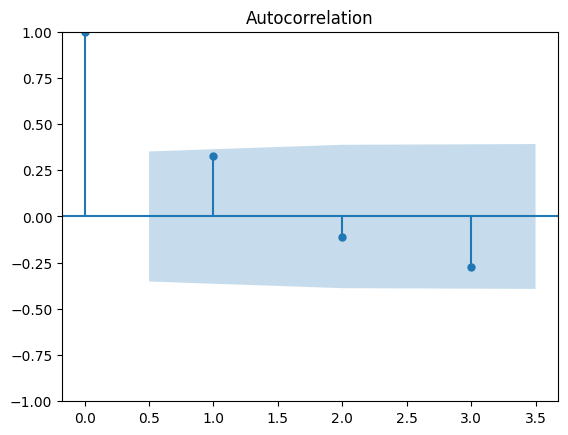

In [14]:
from statsmodels.graphics.tsaplots import plot_acf

import matplotlib.pyplot as plt

plot_acf(binary_precipitation, lags=3)
plt.show()

autocorrelation: [1, 0.3349282296650718, 0.11217691902657909, 0.03757121689885424, 0.01258366116229568]


Text(0.5, 0, 'Time lag t')

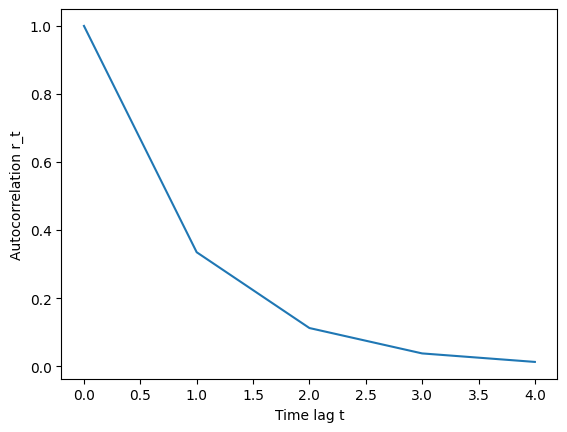

In [19]:
#According to the equation

r_0 = 1
r_1 = p_11 - p_01
r_2 = r_1**2
r_3 = r_1**3
r_4 = r_1**4
auto_correlation = [r_0,r_1,r_2,r_3,r_4]
print("autocorrelation:", auto_correlation)
lag = [0,1,2,3,4]
plt.plot(lag,auto_correlation)
plt.ylabel("Autocorrelation r_t")
plt.xlabel("Time lag t")

In [29]:
# A sequence of 0's (dry spells) p_01?
print("p for spell length of geometrical distribution", (1-p_11))

p for spell length of geometrical distribution 0.21052631578947367


In [37]:
#Geometrical distribution Pr{X=x} = p(1-p)**(x-1) x=1,2..


print((1-p_01)*(1-1+p_01)**2)

0.11269722013523664


In [ ]:
# Stationarity p_i1 = 